# How we can use our monitoring metric?

This notebook shows we can utilise the metric service to retrieve the readability and embedding data store in the postgres metric database.

The notebook will first request the metric service using curl and then plot a time vs readability and a time vs embeddings average distance graph.

In [1]:
import requests

If you have followed the readme to host the metric service, you will not need to modify any of the variables below assuming you can reach the service with port-forwarding or hosting the service locally.

If you are not sure whether you have set up the metric service correctly, yplease check out the monitoring section of the [README.md](https://github.com/fuzzylabs/MindGPT#monitoring).

In [2]:
METRIC_SERVICE_HOST = "localhost"
METRIC_SERVICE_PORT = "5000"
QUERY_READABILITY_ENDPOINT = "/query_readability"
QUERY_EMBEDDING_DRIFT_ENDPOINT = "/query_embedding_drift"

Let's test whether we can reach our metric service

In [3]:
response = requests.get(f"http://{METRIC_SERVICE_HOST}:{METRIC_SERVICE_PORT}")
print(response.text)

Hello world from the metric service.


We should expect to see a message from the service saying "Hello world from the metric service." if successful.

We are not ready to query some data, let's start with getting the readability data from our postgres metric database.

In [4]:
response = requests.get(f"http://{METRIC_SERVICE_HOST}:{METRIC_SERVICE_PORT}/{QUERY_READABILITY_ENDPOINT}")
readability_data = response.json()
readability_data

[[1, 'Fri, 11 Aug 2023 09:23:36 GMT', 93.81],
 [2, 'Fri, 11 Aug 2023 09:23:49 GMT', 116.15],
 [3, 'Fri, 11 Aug 2023 09:24:36 GMT', 104.64],
 [4, 'Fri, 11 Aug 2023 09:25:13 GMT', 82.65],
 [5, 'Fri, 11 Aug 2023 09:25:28 GMT', 119.19],
 [6, 'Fri, 11 Aug 2023 09:25:58 GMT', 69.28],
 [7, 'Fri, 11 Aug 2023 09:26:26 GMT', 66.33]]

Cool, the above cells should return a list of list containing the id, timestamp and the readability score.

Let's put it in a pandas dataframe so that it'd be easier to work with.

In [5]:
import pandas as pd

In [6]:
readability_df = pd.DataFrame(readability_data, columns=["ID", "Timestamp", "ReadabilityScore"])
readability_df.set_index('ID', inplace=True)
readability_df

,Timestamp,ReadabilityScore
ID,,
1,"Fri, 11 Aug 2023 09:23:36 GMT",93.81
2,"Fri, 11 Aug 2023 09:23:49 GMT",116.15
3,"Fri, 11 Aug 2023 09:24:36 GMT",104.64
4,"Fri, 11 Aug 2023 09:25:13 GMT",82.65
5,"Fri, 11 Aug 2023 09:25:28 GMT",119.19
6,"Fri, 11 Aug 2023 09:25:58 GMT",69.28
7,"Fri, 11 Aug 2023 09:26:26 GMT",66.33


We can do anything we want with the data we have. For example, we can set up an alert system to alert us when the average readability score has dropped below a threshold. In this example, we will simply plot a graph of readability over time.

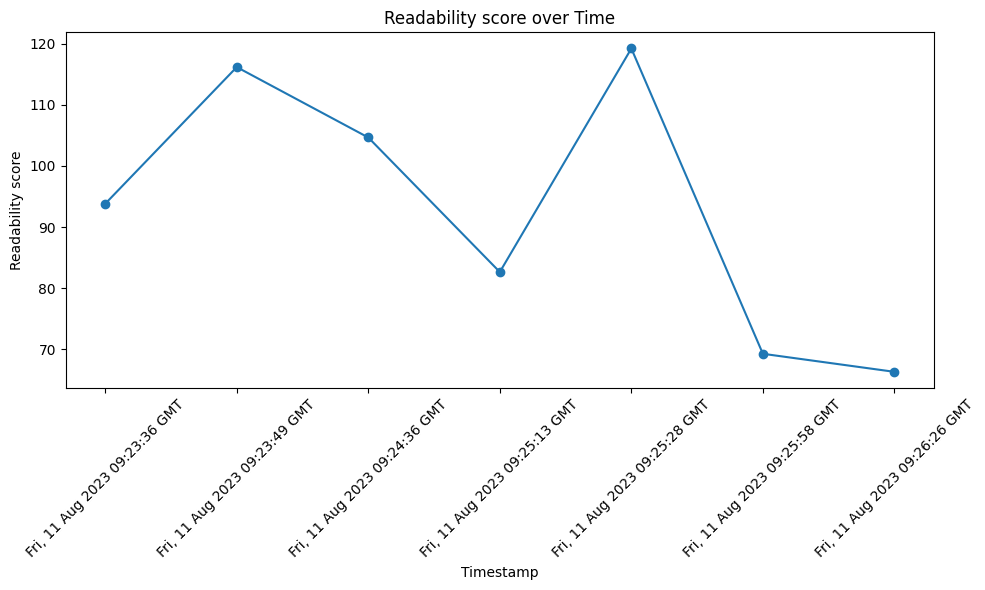

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(readability_df['Timestamp'], readability_df['ReadabilityScore'], marker='o', linestyle='-')
plt.title('Readability score over Time')
plt.xlabel('Timestamp')
plt.ylabel('Readability score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's do the same for our Embedding drift data. First, let's query for the data from our database.

In [8]:
response = requests.get(f"http://{METRIC_SERVICE_HOST}:{METRIC_SERVICE_PORT}/{QUERY_EMBEDDING_DRIFT_ENDPOINT}")
embedding_drift_data = response.json()
embedding_drift_data

[[4, 'Fri, 11 Aug 2023 09:21:39 GMT', '1.1', '1.1', 0.1, True],
 [5, 'Fri, 11 Aug 2023 09:21:48 GMT', '1.1', '1.2', 0.3, True],
 [6, 'Fri, 11 Aug 2023 09:21:55 GMT', '1.1', '1.3', 0.5, True],
 [7, 'Fri, 11 Aug 2023 09:22:04 GMT', '1.1', '1.4', 0.8, True],
 [8, 'Fri, 11 Aug 2023 09:22:15 GMT', '1.1', '1.5', 1.2, True],
 [9, 'Fri, 11 Aug 2023 09:22:23 GMT', '1.1', '1.6', 1.0, True],
 [10, 'Fri, 11 Aug 2023 09:22:31 GMT', '1.1', '1.7', 0.7, True],
 [11, 'Fri, 11 Aug 2023 09:22:39 GMT', '1.1', '1.8', 0.8, True],
 [12,
  'Fri, 11 Aug 2023 09:42:47 GMT',
  'data/second_version',
  'data/second_version',
  0.0,
  False],
 [13,
  'Fri, 11 Aug 2023 09:42:56 GMT',
  'data/second_version',
  'data/second_version',
  0.0,
  False]]

In [9]:
embedding_drift_df = pd.DataFrame(embedding_drift_data, columns=["ID", "Timestamp", "ReferenceDataset", "CurrentDataset", "Distance", "Drifted"])
embedding_drift_df.set_index('ID', inplace=True)
embedding_drift_df

,Timestamp,ReferenceDataset,CurrentDataset,Distance,Drifted
ID,,,,,
4,"Fri, 11 Aug 2023 09:21:39 GMT",1.1,1.1,0.1,True
5,"Fri, 11 Aug 2023 09:21:48 GMT",1.1,1.2,0.3,True
6,"Fri, 11 Aug 2023 09:21:55 GMT",1.1,1.3,0.5,True
7,"Fri, 11 Aug 2023 09:22:04 GMT",1.1,1.4,0.8,True
8,"Fri, 11 Aug 2023 09:22:15 GMT",1.1,1.5,1.2,True
9,"Fri, 11 Aug 2023 09:22:23 GMT",1.1,1.6,1.0,True
10,"Fri, 11 Aug 2023 09:22:31 GMT",1.1,1.7,0.7,True
11,"Fri, 11 Aug 2023 09:22:39 GMT",1.1,1.8,0.8,True
12,"Fri, 11 Aug 2023 09:42:47 GMT",data/second_version,data/second_version,0.0,False


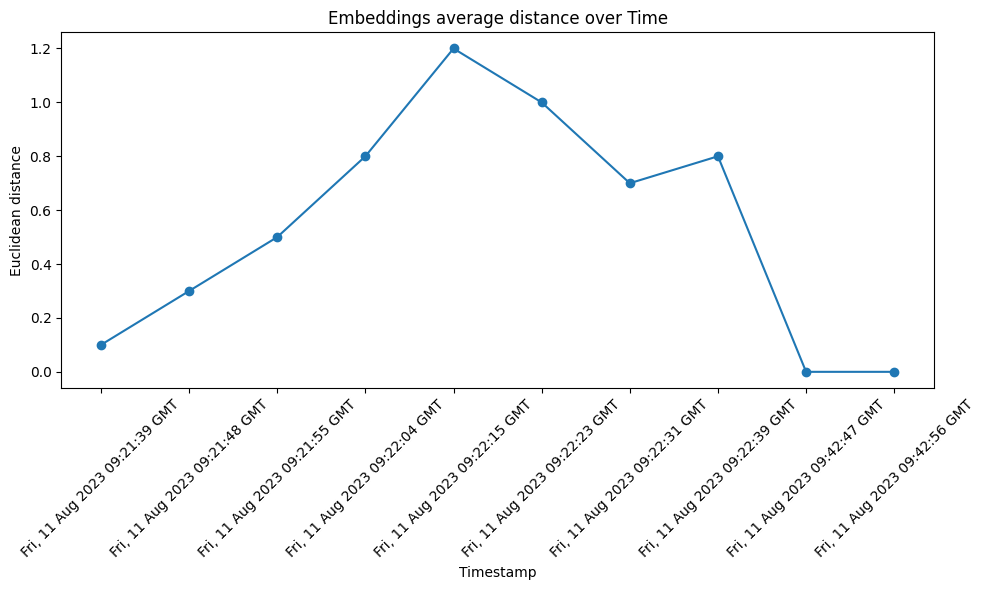

In [10]:
plt.figure(figsize=(10,6))
plt.plot(embedding_drift_df['Timestamp'], embedding_drift_df['Distance'], marker='o', linestyle='-')
plt.title('Embeddings average distance over Time')
plt.xlabel('Timestamp')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()